<a href="https://colab.research.google.com/github/nuyhc/RhythmStudy/blob/main/1.%20PyTorch/tf2torch/1_Facial_Keypoint_Detection_%EB%B0%95%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Keypoints Detection
Detect the location of keypoints on face images

### Data files
* `training.csv`: list of training 7049 images. Each row contains the (x,y) coordinates for 15 keypoints, and image data as row-ordered list of pixels.
* `test.csv`: list of 1783 test images. Each row contains ImageId and image data as row-ordered list of pixels
* `submissionFileFormat.csv`: list of 27124 keypoints to predict. Each row contains a RowId, ImageId, FeatureName, Location. FeatureName are "left_eye_center_x," "right_eyebrow_outer_end_y," etc. Location is what you need to predict. 

### Reference
[kaggle Notebook - karanjakhar/facial-keypoint-detection](https://www.kaggle.com/code/karanjakhar/facial-keypoint-detection)

# 1. Colab에서 kaggle datasets 불러오기

In [2]:
!pip install -q kaggle

In [ ]:
%cd /content/drive/MyDrive/리듬스터디

In [ ]:
!ls -al

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

In [ ]:
!kaggle competitions download -c facial-keypoints-detection

In [ ]:
!unzip /content/drive/MyDrive/리듬스터디/facial-keypoints-detection.zip
!unzip /content/drive/MyDrive/리듬스터디/training.zip
!unzip /content/drive/MyDrive/리듬스터디/test.zip

# 2. Library Load

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

# 3. Dataset Load

In [2]:
Train_Dir = '/content/drive/MyDrive/리듬스터디/training.csv'
Test_Dir = '/content/drive/MyDrive/리듬스터디/test.csv'
lookid_dir = '/content/drive/MyDrive/리듬스터디/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)
os.listdir('/content/drive/MyDrive/리듬스터디')

['training.csv',
 'test.csv',
 'test.zip',
 'SampleSubmission.csv',
 'IdLookupTable.csv',
 'training.zip',
 '1. PyTorch',
 'facial-keypoints-detection.zip',
 'model.png',
 'face_key_detection_submission.csv',
 '1_Facial_Keypoint_Detection_박지현.ipynb']

# 4. Explore Dataset

Let's explore our dataset

In [3]:
display(train_data.shape)
test_data.shape

(7049, 31)

(1783, 2)

In [4]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


Let's check for missing values

In [5]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [6]:
train_data.fillna(method = 'ffill', inplace = True)

In [7]:
train_data.tail().T

,7044,7045,7046,7047,7048
left_eye_center_x,67.402546,66.1344,66.690732,70.965082,66.938311
left_eye_center_y,31.842551,38.365501,36.845221,39.853666,43.42451
right_eye_center_x,29.746749,30.478626,31.66642,30.543285,31.096059
right_eye_center_y,38.632942,39.950198,39.685042,40.772339,39.528604
left_eye_inner_corner_x,59.255347,59.255347,59.255347,59.255347,59.255347
left_eye_inner_corner_y,36.065143,36.065143,36.065143,36.065143,36.065143
left_eye_outer_corner_x,73.942694,73.942694,73.942694,73.942694,73.942694
left_eye_outer_corner_y,34.624653,34.624653,34.624653,34.624653,34.624653
right_eye_inner_corner_x,37.478531,37.478531,37.478531,37.478531,37.478531
right_eye_inner_corner_y,39.398041,39.398041,39.398041,39.398041,39.398041


In [8]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [9]:
image = []
for i in range(0, 7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    image.append(img)

In [10]:
image_list = np.array(image, dtype='float')
X_train = image_list.reshape(-1, 96, 96, 1)

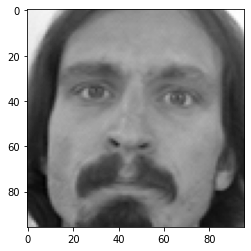

In [11]:
plt.imshow(X_train[0].reshape(96, 96), cmap='gray')
plt.show()

Now let's separate labels.

In [12]:
training = train_data.drop('Image', axis=1)

y_train = []
for i in range(0, 7049):
    y = training.iloc[i, :]

    y_train.append(y)
y_train = np.array(y_train, dtype='float')

# 5. Modeling

In [13]:
from keras.layers import Conv2D, Dropout, Dense, Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96, 96)),
                    Dense(128, activation="relu"),
                    Dropout(0.1),
                    Dense(64, activation="relu"),
                    Dense(30)
                    ])

Using TensorFlow backend.

In [14]:
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D, MaxPool2D, ZeroPadding2D

In [15]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same', use_bias=False, input_shape=(96, 96, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(64, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(96, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(128, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(256, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(512, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        288       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                      

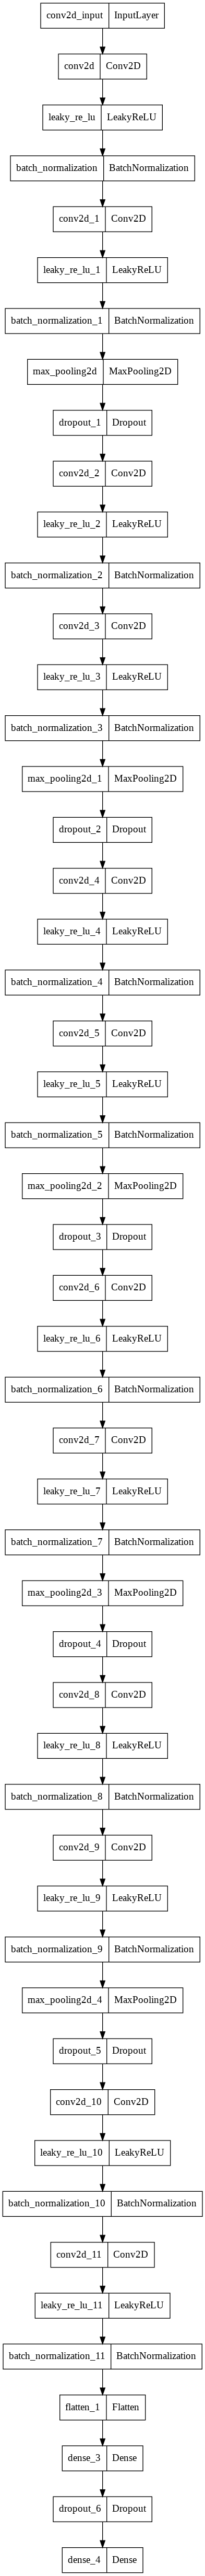

In [16]:
# keras.utils의 plot_model 을 통한 레이어 시각화
from keras.utils import plot_model

plot_model(model)

In [17]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [18]:
# EarlyStopping
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='mae', patience=10)

In [19]:
# fit
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
23/23 [==============================] - 14s 99ms/step - loss: 364.6576 - mae: 12.4868 - val_loss: 596.9698 - val_mae: 22.5749
Epoch 2/50
23/23 [==============================] - 1s 60ms/step - loss: 33.2703 - mae: 4.4868 - val_loss: 93.1072 - val_mae: 8.8184
Epoch 3/50
23/23 [==============================] - 1s 60ms/step - loss: 26.9891 - mae: 4.0116 - val_loss: 68.6054 - val_mae: 7.4461
Epoch 4/50
23/23 [==============================] - 1s 59ms/step - loss: 24.6751 - mae: 3.8213 - val_loss: 69.9474 - val_mae: 7.6459
Epoch 5/50
23/23 [==============================] - 1s 60ms/step - loss: 22.9658 - mae: 3.6696 - val_loss: 54.5867 - val_mae: 6.6565
Epoch 6/50
23/23 [==============================] - 1s 60ms/step - loss: 21.3939 - mae: 3.5329 - val_loss: 26.9731 - val_mae: 4.6198
Epoch 7/50
23/23 [==============================] - 1s 60ms/step - loss: 20.1107 - mae: 3.4148 - val_loss: 28.5402 - val_mae: 4.5844
Epoch 8/50
23/23 [==============================] - 1s 60ms/step

Now let's prepare our testing data

In [20]:
#preparing test data
timage = []
for i in range(0, 1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]

    timage.append(timg)

Reshaping and converting

In [21]:
timage_list = np.array(timage, dtype='float')
X_test = timage_list.reshape(-1, 96, 96, 1)

Let's see first image in our test data

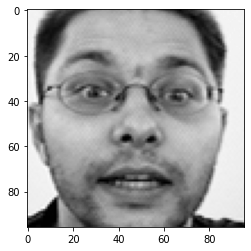

In [22]:
plt.imshow(X_test[0].reshape(96, 96), cmap='gray')
plt.show()

# 6. Predict
Let's predict our results

In [23]:
pred = model.predict(X_test)

56/56 [==============================] - 1s 5ms/step


In [24]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [25]:
rowid = lookid_data['RowId']
rowid = list(rowid)

In [26]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [27]:
preded = []
for x, y in zip(imageID, feature):
    preded.append(pre_list[x][y])

In [28]:
rowid = pd.Series(rowid, name='RowId')

In [29]:
loc = pd.Series(preded, name='Location')

# 7. Submission

In [30]:
submission = pd.concat([rowid, loc], axis=1)
submission
# submission.to_csv('face_key_detection_submission.csv',index = False)

,RowId,Location
0,1,65.913879
1,2,35.484112
2,3,29.596447
3,4,34.673370
4,5,59.492130
...,...,...
27119,27120,37.954666
27120,27121,48.173695
27121,27122,62.741650
27122,27123,48.092613
